# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [9]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [10]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

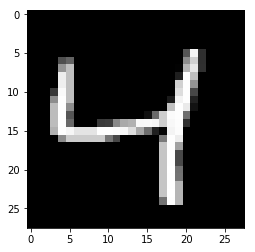

In [11]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [12]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(
    tf.float32,
    shape=[None, 784],name='inputs')
targets_ = tf.placeholder(
    tf.float32,
    shape=[None, 784],name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_,encoding_dim,activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded,784,activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits,name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_,logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [13]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [14]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6929
Epoch: 1/20... Training loss: 0.6894
Epoch: 1/20... Training loss: 0.6857
Epoch: 1/20... Training loss: 0.6815
Epoch: 1/20... Training loss: 0.6761
Epoch: 1/20... Training loss: 0.6683
Epoch: 1/20... Training loss: 0.6606
Epoch: 1/20... Training loss: 0.6512
Epoch: 1/20... Training loss: 0.6402
Epoch: 1/20... Training loss: 0.6272
Epoch: 1/20... Training loss: 0.6121
Epoch: 1/20... Training loss: 0.5964
Epoch: 1/20... Training loss: 0.5818
Epoch: 1/20... Training loss: 0.5635
Epoch: 1/20... Training loss: 0.5458
Epoch: 1/20... Training loss: 0.5284
Epoch: 1/20... Training loss: 0.5091
Epoch: 1/20... Training loss: 0.4877
Epoch: 1/20... Training loss: 0.4701
Epoch: 1/20... Training loss: 0.4511
Epoch: 1/20... Training loss: 0.4348
Epoch: 1/20... Training loss: 0.4206
Epoch: 1/20... Training loss: 0.4077
Epoch: 1/20... Training loss: 0.3904
Epoch: 1/20... Training loss: 0.3779
Epoch: 1/20... Training loss: 0.3702
Epoch: 1/20... Training loss: 0.3526
E

Epoch: 1/20... Training loss: 0.1955
Epoch: 1/20... Training loss: 0.1958
Epoch: 1/20... Training loss: 0.1915
Epoch: 1/20... Training loss: 0.2007
Epoch: 1/20... Training loss: 0.1975
Epoch: 1/20... Training loss: 0.1993
Epoch: 1/20... Training loss: 0.1925
Epoch: 1/20... Training loss: 0.1877
Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1970
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.1959
Epoch: 1/20... Training loss: 0.1875
Epoch: 1/20... Training loss: 0.1921
Epoch: 1/20... Training loss: 0.1883
Epoch: 1/20... Training loss: 0.1928
Epoch: 1/20... Training loss: 0.1922
Epoch: 1/20... Training loss: 0.1891
Epoch: 1/20... Training loss: 0.2000
Epoch: 1/20... Training loss: 0.1924
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1948
Epoch: 1/20... Training loss: 0.1911
Epoch: 1/20... Training loss: 0.1904
Epoch: 1/20... Training loss: 0.1916
Epoch: 1/20... Training loss: 0.1866
E

Epoch: 2/20... Training loss: 0.1604
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1580
Epoch: 2/20... Training loss: 0.1515
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1597
Epoch: 2/20... Training loss: 0.1600
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1521
Epoch: 2/20... Training loss: 0.1579
Epoch: 2/20... Training loss: 0.1579
Epoch: 2/20... Training loss: 0.1583
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1607
Epoch: 2/20... Training loss: 0.1610
Epoch: 2/20... Training loss: 0.1485
Epoch: 2/20... Training loss: 0.1499
Epoch: 2/20... Training loss: 0.1570
E

Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1393
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1391
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1390
Epoch: 3/20... Training loss: 0.1319
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1262
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1393
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1314
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1355
E

Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1133
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1174
Epoch: 4/20... Training loss: 0.1272
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1222
E

Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1162
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1162
Epoch: 5/20... Training loss: 0.1179
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1164
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1106
E

Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1040
Epoch: 5/20... Training loss: 0.1059
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1041
Epoch: 5/20... Training loss: 0.1046
Epoch: 5/20... Training loss: 0.1046
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1064
Epoch: 5/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1100
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1124
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1086
Epoch: 6/20... Training loss: 0.1120
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1099
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1063
E

Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.1006
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1013
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1003
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1001
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.0998
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1004
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1013
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1000
Epoch: 6/20... Training loss: 0.1032
E

Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.0957
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.0984
E

Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0947
Epoch: 8/20... Training loss: 0.1022
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0982
E

Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0930
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0926
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0943
E

Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0990
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0905
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0987
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0973
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0981
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0914
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0985
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0905
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0985
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0906
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0890
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0856
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0975
Epoch: 14/20... Training loss: 0.0880
Epoch: 14/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0900
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0899
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0998
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0904
Epoch: 15/20... Training loss: 0.0985
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0885
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0902
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0983
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0867
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0990
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0983
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0896
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0971
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0969
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0899
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0897
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0980
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0969
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0893
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0900
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0895
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0894
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

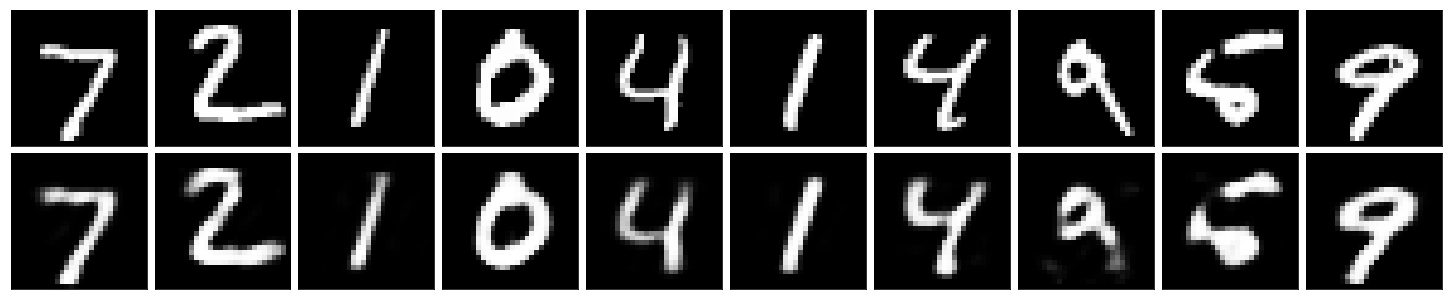

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.